<h3>Image Handling and Processing with Python</h3>

Images handling and processing plays important roles in computer vision. With examples in Python, we are going to introduce you the basic tools for reading images, converting and scaling images, computing derivatives, plotting or saving results, and so on.

The Python Imaging Library (`PIL`) (in newer versions known as `Pillow`)
adds image processing capabilities to Python interpreter. This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities. The core image library is designed for fast access to data stored in a few basic pixel formats. It should provide a solid foundation for a general image processing tool. Run the following command to install this package.

`(sudo) pip3 install -U pillow`

<b>OpenCV</b> (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision, originally developed by Intel's research center. It is mainly used to do all the operation related to Images. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception.

The library has approximately 3000 optimized algorithms, which includes a comprehensive set of computer vision and machine learning algorithms. These algorithms can be used to read and write images, detect shapes like circle, rectangle, detect and recognize faces, identify objects, stitch images together to produce a panorama image, extract 3D models of objects, recognize scenery and establish markers to overlay it with augmented reality, etc. It has C++, Python, Java and MATLAB interfaces and supports Windows, Linux, Android, Mac OS and iOS. Run the following command to install latest version of OpneCV in Python.

`(sudo) pip3 install -U opencv-python`

You may download all image files and python notebook from the following link:
https://spotleai.sgp1.digitaloceanspaces.com/course/zip/CV%20example%20images.zip

Using PIL, you can read images from most formats and write to the most common ones. The most important module is the Image module. To read an image use:

In [1]:
from PIL import Image

`open` function in Image opens and identifies the given image file.
This is a lazy operation; this function identifies the file, but the file remains open and the actual image data is not read from the file until you try to process the data. The function takes a filename (string), pathlib. Path object or a file object as a parameter. The function returns an Image object.

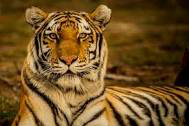

In [2]:
img = Image.open('images/tiger.jpeg')
img

Color conversions are done using the `convert()` method in Image class. The method returns a converted copy of this image. If mode is omitted, a mode is chosen so that all information in the image and the palette can be represented without a palette.
When translating a color image to greyscale (mode 'L'), the library uses the ITU-R 601-2 luma transform:

L = R * 299/1000 + G * 587/1000 + B * 114/1000

Parameters:	
- mode – The requested mode. The mode of an image defines the type and depth of a pixel in the image. Each pixel uses the full range of the bit depth. So a 1-bit pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on. The current release supports the following standard modes:

    - 1 (1-bit pixels, black and white, stored with one pixel per byte)
    - L (8-bit pixels, black and white)
    - P (8-bit pixels, mapped to any other mode using a color palette)
    - RGB (3x8-bit pixels, true color)
    - RGBA (4x8-bit pixels, true color with transparency mask)
    - CMYK (4x8-bit pixels, color separation)
    - YCbCr (3x8-bit pixels, color video format)
    - LAB (3x8-bit pixels, the L*a*b color space)
    - HSV (3x8-bit pixels, Hue, Saturation, Value color space)
    - I (32-bit signed integer pixels)
    - F (32-bit floating point pixels)
- matrix – An optional conversion matrix. If given, this should be 4- or 12-tuple containing floating point values.
- dither – Dithering method, used when converting from mode “RGB” to “P” or from “RGB” or “L” to “1”. Available methods are NONE or FLOYDSTEINBERG (default). Note that this is not used when matrix is supplied.
- palette – Palette to use when converting from mode “RGB” to “P”. Available palettes are WEB or ADAPTIVE.
- colors – Number of colors to use for the ADAPTIVE palette. Defaults to 256.

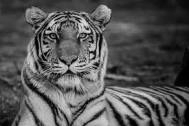

In [3]:
img = Image.open('images/tiger.jpeg').convert('L')
img

PIL can save images in most image file formats, using the `save()` method. The following is an example that takes a `BMP` image file and converts the images to `JPEG` file.

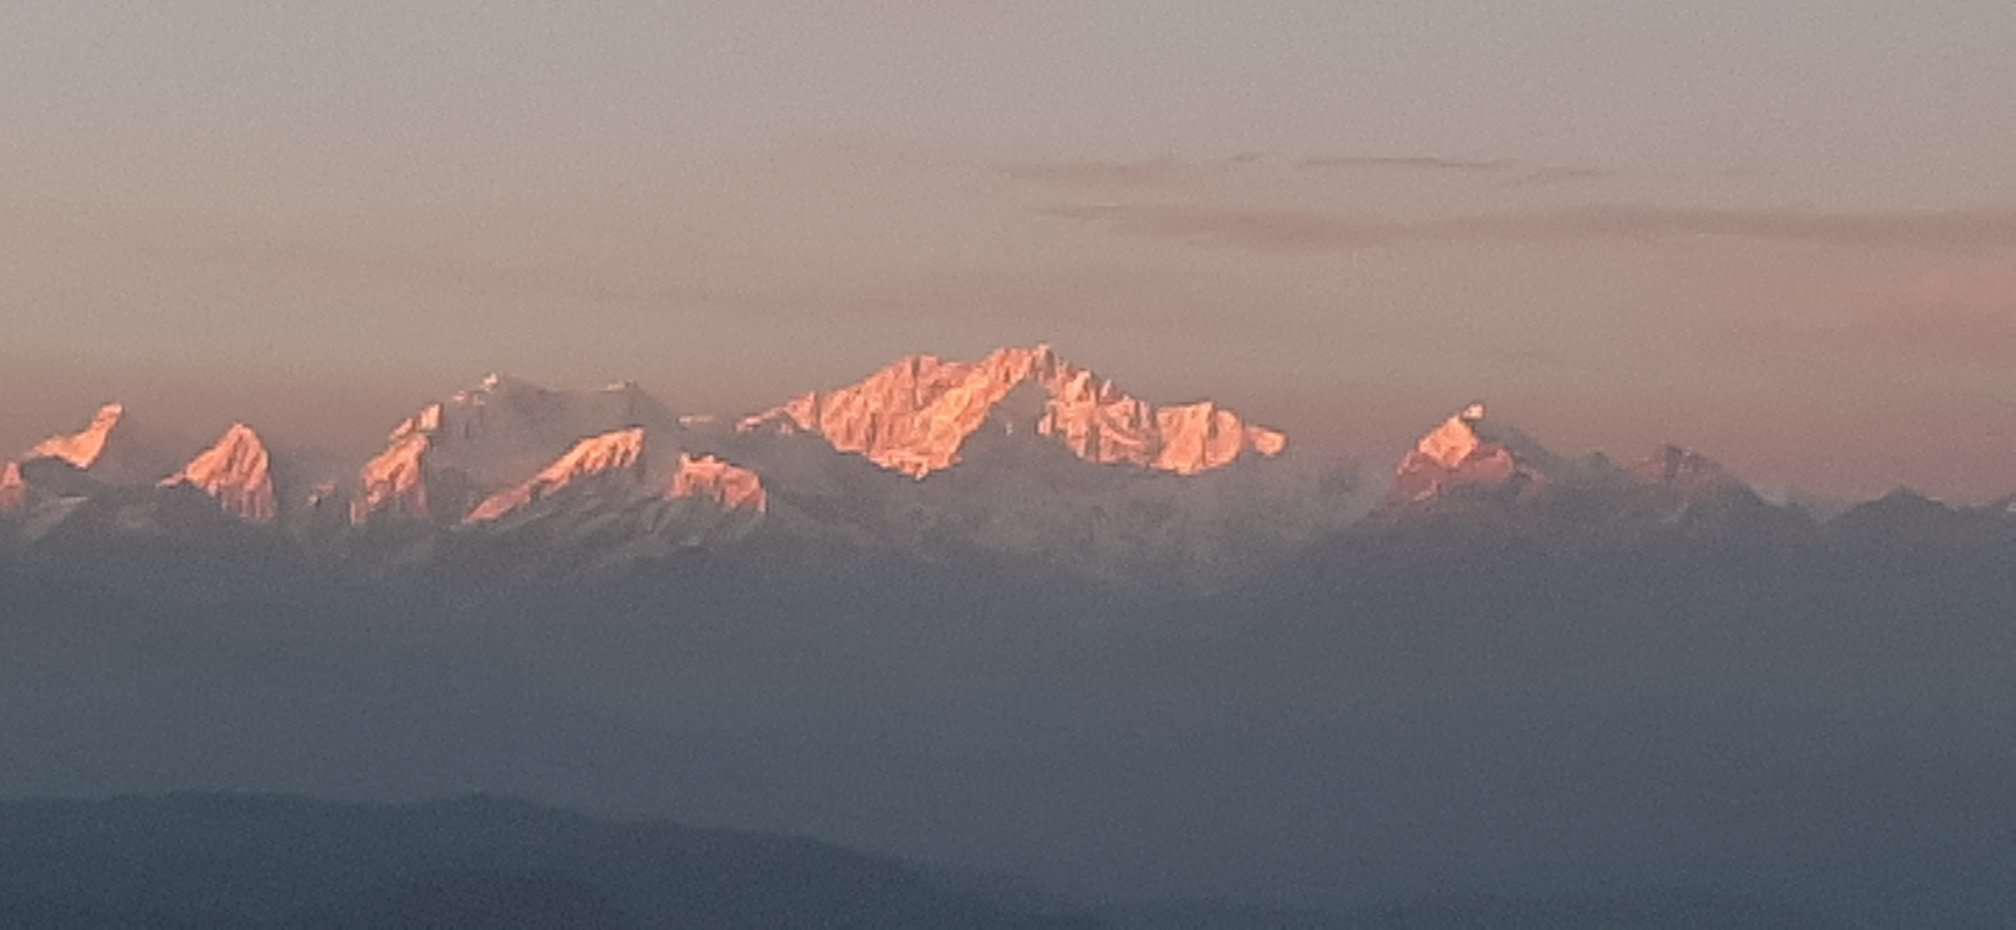

In [4]:
infile = 'images/himalaya.bmp'
outfile = 'images/himalaya.jpg'
try:
    Image.open(infile).save(outfile)
except IOError:
    print ("cannot convert")
Image.open(outfile)

To resize an image, call resize() with a tuple giving the new size. The following example resizes the given image from (width, height) to (width/5, height/5), that is scale down by 5:

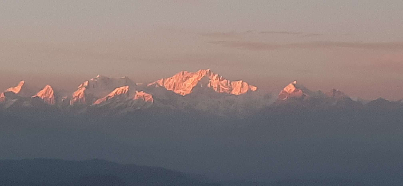

In [5]:
img = Image.open('images/himalaya.bmp')

(width, height) = (img.width // 5, img.height // 5)
nimg = img.resize((width, height))
nimg

The `thumbnail()` method takes a tuple specifying the new size and converts the image to a thumbnail image with size that fits within the tuple. The method Make this image into a thumbnail. This method modifies the image to contain a thumbnail version of itself, no larger than the given size. This method calculates an appropriate thumbnail size to preserve the aspect of the image. The following example creates a thumbnail of size 50x50.

In [6]:
out = Image.open('images/horse.png')
out.thumbnail((50,50))
out.save('images/horse_thumb.png')
Image.open('images/horse_thumb.png')

Suppose you want to crop the face of the tiger from previous example. `crop()` method crops a region from an image. The region is defined by a 4-tuple, where coordinates are (left, upper, right, lower).
PIL uses a coordinate system with (0, 0) in the upper left corner.

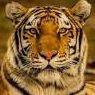

In [7]:
img = Image.open('images/tiger.jpeg')
sub_img = img.crop((20, 5, 115, 100))
sub_img

Inverting an image in grayscale can be achieved by the following few steps. First, need to create a NumPy array from an image object. Values in the array lies between 0 to 255. Invert values by subtracting each value from 255. And finally create an image object from the NumPy array.

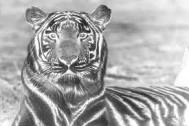

In [8]:
import numpy as np

img_gray = Image.open('images/tiger.jpeg').convert('L')
img_array = np.array(img_gray)
img_array = 255 - img_array
img_neg = Image.fromarray(img_array)
img_neg

The above show the inverted image whereas the following is original image in grayscale.

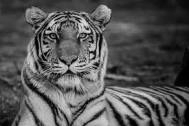

In [9]:
img_gray

<h4>Edge Detection</h4>

The PIL provides various image filters including the edge detection filters and edge enhancement filters. Like the other image filter   implementations provided by Pillow, edge detection filter as well is implemented using a convolution of a specific kernel onto the image.
The convolution matrix used by pillow for the edge detection is given by:<pre>
(
    -1, -1, -1,
    -1,  8, -1,
    -1, -1, -1
)</pre>

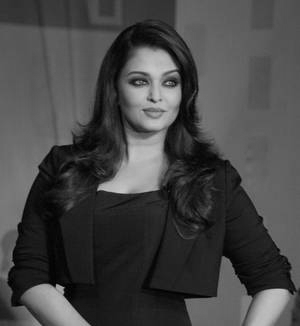

In [10]:
from PIL import ImageFilter
im = Image.open('images/ashrai.jpeg').convert('L')
im

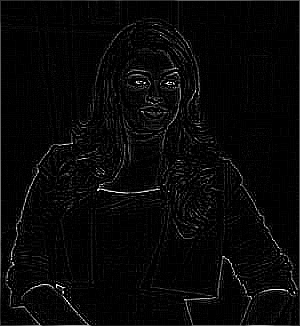

In [11]:
im.filter(ImageFilter.FIND_EDGES)

OpenCV also offers a very usefull function called Canny, which is very popular its effectiveness.
The Canny edge detection algorithm is a a five-step process that is developed by John F. Canny.
Although, in OpenCV it is just one function call. Following are the steps:-

1. Noise reduction - Denoises the image with a Gaussian filter

2. Calculates gradients - An edge occurs when the color of an image changes, hence the intensity of the pixel changes as well. The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators.

3. Non-maximum suppression - The image magnitude produced results in thick edges. Ideally, the final image should have thin edges. Thus, we must perform non maximum suppression to thin out the edges. The algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions.

4. Double thresholding - A double threshold on all the detected edges to eliminate false positives. Pixels with a high value are likely to be edges. All pixels with low value are not an edge. Pixels with moderate values are considered to be weak edge.

5. Edge tracking by hysteresis - Analyzes all the edges and their connection to each other to keep the real edges and discard the weak ones.

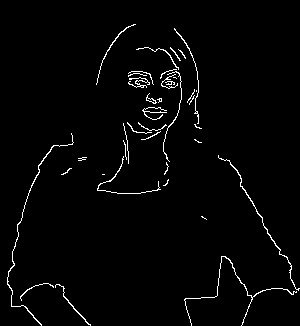

In [12]:
import cv2
import numpy as np
from PIL import Image

img = cv2.imread("images/ashrai.jpeg", 0)
cv2.imwrite("images/canny.jpg", cv2.Canny(img, 150, 250))
Image.open('images/canny.jpg')

You can increase or decrease number of edges by setting different thresolds.

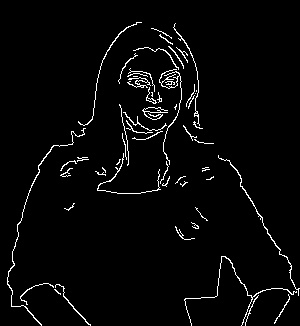

In [13]:
cv2.imwrite("images/canny.jpg", cv2.Canny(img, 100, 200))
Image.open('images/canny.jpg')

<h4>Contour Detection</h4>

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.
Contours are different from edges. Contours can be thought as one forward step from detecting edges. The algorithm necessarily find edges of images but also puts them in a hierarchy. Contours are aimed at being object contours. Thus, they need to be closed curves.

`findContours` function in OpenCV intent to find contours in the image. Of course to some treatment like bluring or edge detection be applied to reduce noise to get a good contours detection.

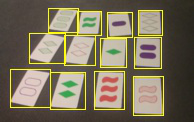

In [14]:
import cv2
import numpy as np

img = cv2.pyrDown(cv2.imread("images/cards.png", cv2.IMREAD_UNCHANGED))

edge = cv2.Canny(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 100, 200)
contours, hier = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # find bounding box coordinates
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 255), 1)

#cv2.imshow("contours", img)
cv2.imwrite("images/cotour.jpg", img)
Image.open("images/cotour.jpg")